**сеть Хопфилда: ассоциативная память**

Евгений Борисов borisov.e@solarl.ru

---

## библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pickle
import gzip

In [2]:
def plot_images(A,figsize=(10,4)):
    f, axarr = plt.subplots(1,len(A), sharey=False, sharex=False, figsize=figsize)
    for i in range(len(A)): 
        axarr[i].axis('off')
        axarr[i].imshow(A[i])

##  загружаем данные 

In [3]:
# with gzip.open('data/pix/30x30-123/data.pkl.gz','rb') as f: data = pickle.load(f)
# with gzip.open('data/pix/30x30-abc/data.pkl.gz','rb') as f: data = pickle.load(f)
# with gzip.open('data/pix/17x31-123/data.pkl.gz','rb') as f: data = pickle.load(f)

with gzip.open('../data/pix/17x31.pkl.gz','rb') as f: data = pickle.load(f)


In [4]:
ideal = data[0]
test = data[1:]
#n_test = len(data)-1

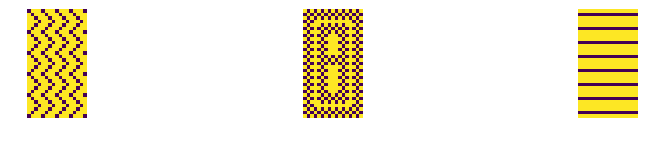

In [5]:
# учебный набор
plot_images(ideal,figsize=(14,2))

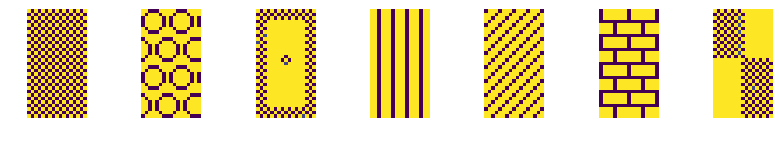

In [6]:
# тестовый набор
for i in range(len(test)): plot_images(test[i],figsize=(14,2))

In [7]:
im_size = ideal[0].shape
im_size

(31, 17)

## загружаем память сети

In [8]:
# масштабруем в [-1,+1]
X_train = np.vstack([ (m.flatten()>0)*2-1 for m in ideal ])
# добавляем сдвиг
X_train = np.hstack( [ X_train,np.ones([X_train.shape[0],1]),] )

In [9]:
W = X_train.T.dot(X_train)
n = W.shape[0]
# удаляем обратную связь нейрона на самого себя (обнуляем главную диагональ матрицы весов)
W = W *(np.ones([n,n])-np.eye(n,n))

In [10]:
def run(x,W,max_iter=50):
    s=x.copy()
    for i in range(max_iter):
        s_prev=s.copy() # сохраняем состояние
        s = np.sign(s.dot(W)) # переходим в новое состояние
        s[-1]=1.0 # сдвиг
        # если состояние не изменилось то завершаем
        if np.all(s==s_prev): break
        # if np.abs(o-o_prev).sum()==0: break
            
    print(i)        
    return s        

## тестируем

энергия сети
$$
E=-\sum\limits_i s_i b_i - \sum\limits_{i<j} s_i s_j w_{ij}
$$
$s_i$ - состояние нейрона $i$,  
$b_i$ - сдвиг нейрона $i$,  
$w_{ij}$ - вес связи нейронов $i j$


In [11]:
def make_test(tt,figsize=(20,2)):
    # масштабруем в [-1,+1]
    X_test = np.vstack([(m.flatten()>0)*2-1 for m in tt])
    # добавляем сдвиг
    X_test = np.hstack( [ X_test,np.ones([X_test.shape[0],1]),] )

    # выполняем для всех тестовых примеров
    out = [ run(X_test[i,:],W) for i in range(X_test.shape[0]) ]
    out = [ ((o+1.0)*0.5*255.0).astype(np.uint8)[:-1].reshape(im_size) for o in out ]
    
    f,axarr = plt.subplots(2,len(tt),sharey=False,sharex=False,figsize=figsize)
    for i in range(len(tt)):
        axarr[0,i].imshow( tt[i] )
        axarr[0,i].axis('off')
        axarr[1,i].imshow( out[i])
        axarr[1,i].axis('off')


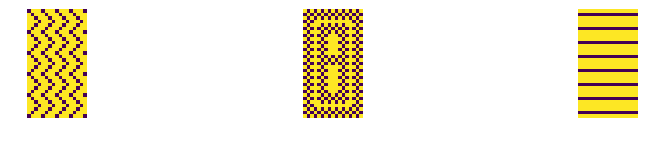

In [12]:
# содержимое памяти сети
plot_images(ideal,figsize=(14,2))

1
1
1
2
2
1
1


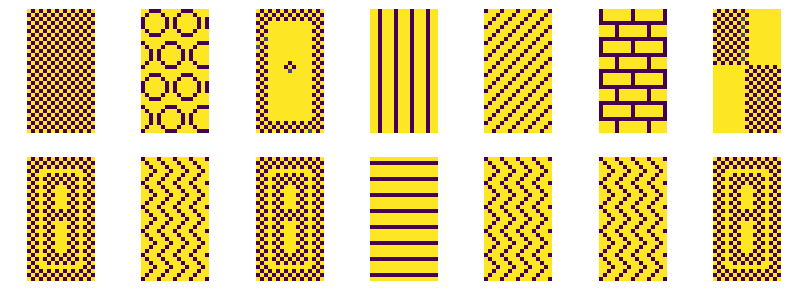

In [13]:
# пары образов: вход,результат(ассоциация)
for i in range(len(test)): make_test(test[i],figsize=(14,5))